In [65]:
from qiskit import * 
from qiskit.extensions import UnitaryGate
from qiskit.tools.visualization import plot_histogram
from qiskit import IBMQ 
from qiskit.providers.ibmq import least_busy 
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline 

In [7]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q-education')


ibmqfactory.load_account:WARNING:2021-06-25 22:32:41,743: Credentials are already in use. The existing account in the session will be replaced.


### The execute function
- Executes a **list** of QuantumCircuits or Schedule on the specified backend.
- execution is **asynchronous**, and a handle to a **job** instance is returned.


In [4]:
??execute

## Main parameters
- **experiments** - the list of experiments we want to run 
- **backend** - the backend on which we want to run them
- **shots** - the number of shots for which our circuit is executed in the backend
- **initial_layout** - which particular qubit is mapped to which qubit of the actual device
    - can be virtual to physical : [0,3,5] means the first qubit in the circuit would be mapped to the 0th qubit of the device, the second qubit of the circuit would be mapped to the 3rd qubit in the device and the third qubit is mapped to the 5th qubit in the device.
- **optimization_level** - the level upto which we want to optimize our circuit ( 3 is the highest, default is 1 )
- **seed_transpiler/simulator** - the random seed we would need to provide for the transpiler and the simulator to run 
- **coupling_map** - 

    - CouplingMap instance
    - list Must be given as an adjacency matrix, where each entry specifies all two-qubit interactions supported by backend e.g: [[0, 1], [0, 3], [1, 2], [1, 5], [2, 5], [4, 1], [5, 3]]

In [62]:
casb = provider.get_backend('ibmq_casablanca')
belem = provider.get_backend('ibmq_belem')

In [59]:
casb.configuration().num_qubits 

7

## Executing a simple phase estimation circuit

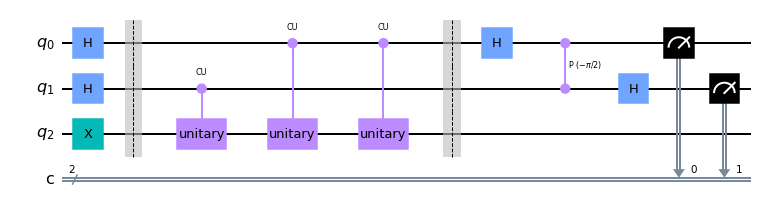

In [76]:
q = QuantumCircuit(3,2)
q.x(2)
q.h([0,1])
q.barrier()
u = UnitaryGate(data = np.array([[1,0],
                            [0,np.exp(2*np.pi*1j*(1/2))]]))
c_gate = u.control(label = 'CU',num_ctrl_qubits = 1, ctrl_state = '1')
q.append(c_gate,qargs = [1,2])
q.append(c_gate,qargs = [0,2])
q.append(c_gate,qargs = [0,2])
q.barrier([0,1,2])
q.h(0)
q.cp(-np.pi/2,0,1)
q.h(1)
# q.barrier()
q.measure([0,1],[0,1])
q.draw('mpl')

In [80]:
job = execute(q,backend=belem,initial_layout=[1,3,4],shots = 2**12,optimization_level=3)
print(job.result())

Result(backend_name='ibmq_belem', backend_version='1.0.14', qobj_id='c45614b1-0921-4ffc-995a-198610edfbff', job_id='60d612a895ecf1057a300fc5', success=True, results=[ExperimentResult(shots=4096, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 379, '0x1': 444, '0x2': 3017, '0x3': 256}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=-3.141592653589793, memory_slots=2, metadata={}, n_qubits=5, name='circuit-519', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]), memory=False)], date=2021-06-25 23:00:33+05:30, status=Successful completion, status=QobjHeader(backend_name='ibmq_belem', backend_version='1.0.14'), time_taken=4.9444191455841064, execution_id='092e316c-d5db-11eb-80d2-b02628f7f59e', client_version={'qiskit': '0.26.0'})


In [81]:
res = job.result()

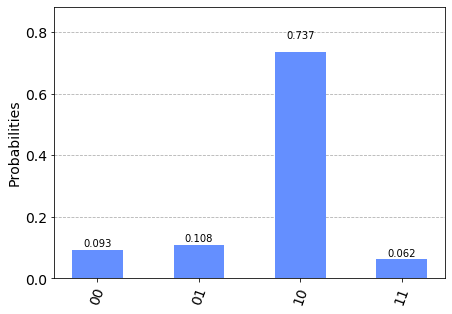

In [82]:
plot_histogram(res.get_counts())

## Cool!

## Amazing function discovered!!! 
- filter

In [34]:
def func(x):
    return x[0] + x[1] > 0

In [37]:
a = [[1,2],[2,1],[4,5],[-1,-1],[5,-9],[-3,2]]
# func acts on the elements of a 
# whatever you wanna do just pass that into 
# the function , coooollll!!!!
b = list(filter(func,a))

In [39]:
b 

[[1, 2], [2, 1], [4, 5]]